In [182]:
# Importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit

In [183]:
# Read data in dataframe
df=pd.read_csv('/Users/MiaHuang/Desktop/Churn_Prediction_Telco_Customer/Resources/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [184]:
# For this project, we won't use the customerID column, so let's drop it!
df.drop(columns = ['customerID'], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [185]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


After reviewing the data and found that data type for the TotalCharges column is seen as object but has numeric type values. So let's change it.

In [186]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [187]:
# check for the nulls
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges column has 11 nulls.

In [188]:
null=df[df.isnull().any(axis=1)]
null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can see that all customers with null TotalCharges are those who have tenure as 0 in the dataset. Maybe new customers? Let's fill 0 as the value instead of dropping them out.

In [189]:
df.TotalCharges=df.TotalCharges.fillna(0)

In [190]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f'_____ {i} _____\n')
    print(df[i].value_counts())
    print('='*35)

_____ gender _____

Male      3555
Female    3488
Name: gender, dtype: int64
_____ SeniorCitizen _____

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
_____ Partner _____

No     3641
Yes    3402
Name: Partner, dtype: int64
_____ Dependents _____

No     4933
Yes    2110
Name: Dependents, dtype: int64
_____ tenure _____

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
_____ PhoneService _____

Yes    6361
No      682
Name: PhoneService, dtype: int64
_____ MultipleLines _____

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
_____ InternetService _____

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
_____ OnlineSecurity _____

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
_____ OnlineBackup _____

No  

## Visualizing Data

In [191]:
# Visualizing Churn proportion
fig=px.pie(df, names='Churn', template='seaborn', title='Churn')
fig.update_traces(rotation=90, pull=[0.1], textinfo='percent+label')
fig.show()

The first thing we notice here is that our target variable is unbalanced, which means we have a much larger proportion of one specific class over another.

Only 26.5% of clients in the dataset were those who left the company.

Now we can divide the features into the following groups:
* Demographic (Gender, SeniorCitizen, Parnter, Dependent)
* Service-related features (PhoneService, MultipleLines, InternetServices, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)
* Account information(categorical and numerical). Categorical_Account info (Contract, PaperlessBilling, PaymentMethod)
Numerical_Account info(MonthlyCharges, TotalCharges)
We can divide the features into the following groups:
For each group, we'll start by looking at the features' distributions. Then we'll check the percentage of churn for each category to understand their relationship with the target.

In [192]:
demo_features =['gender', 'SeniorCitizen', 'Partner', 'Dependents']
Serv_features =['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
cat_acct_features =['Contract', 'PaperlessBilling', 'PaymentMethod']
num_acct_features=['MonthlyCharges', 'TotalCharges']

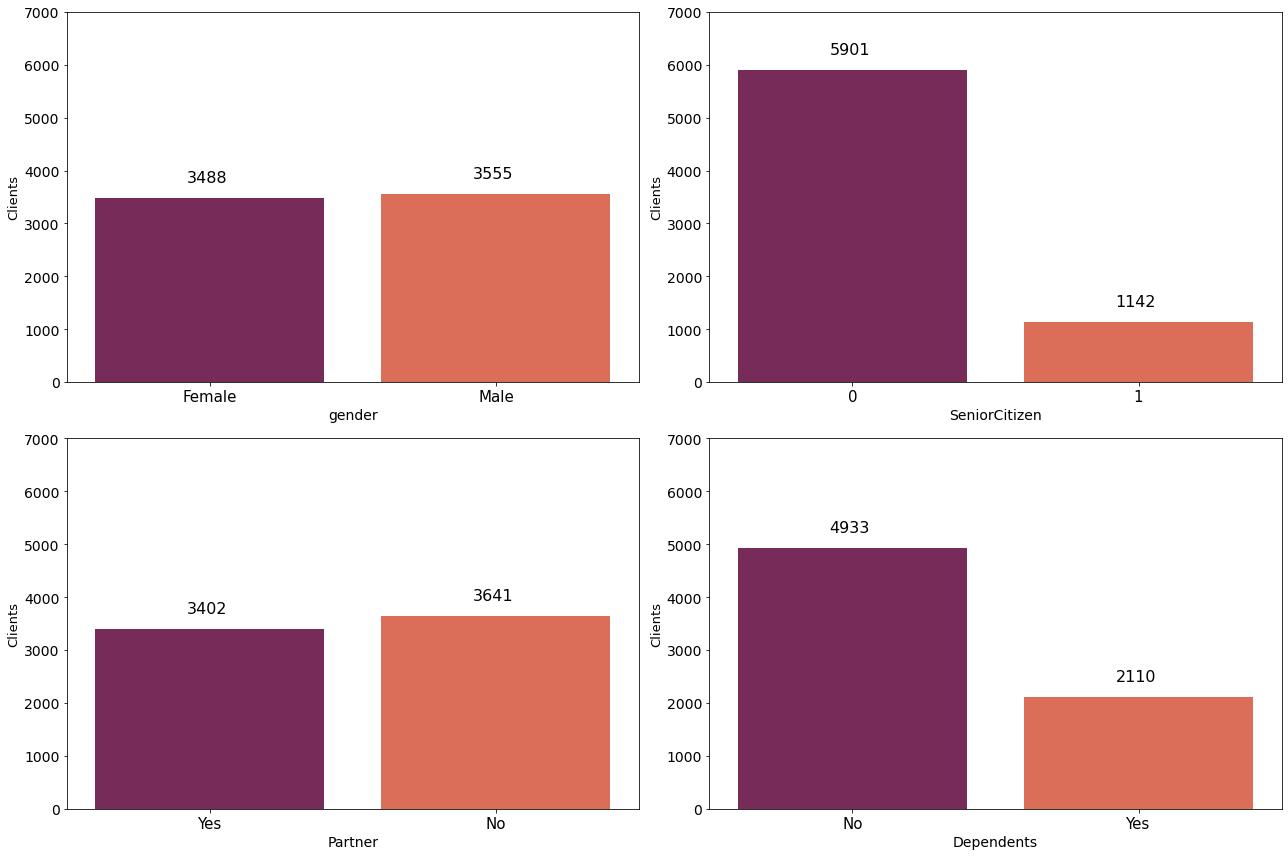

In [193]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2, 2, i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 16)

plt.tight_layout()

plt.show()


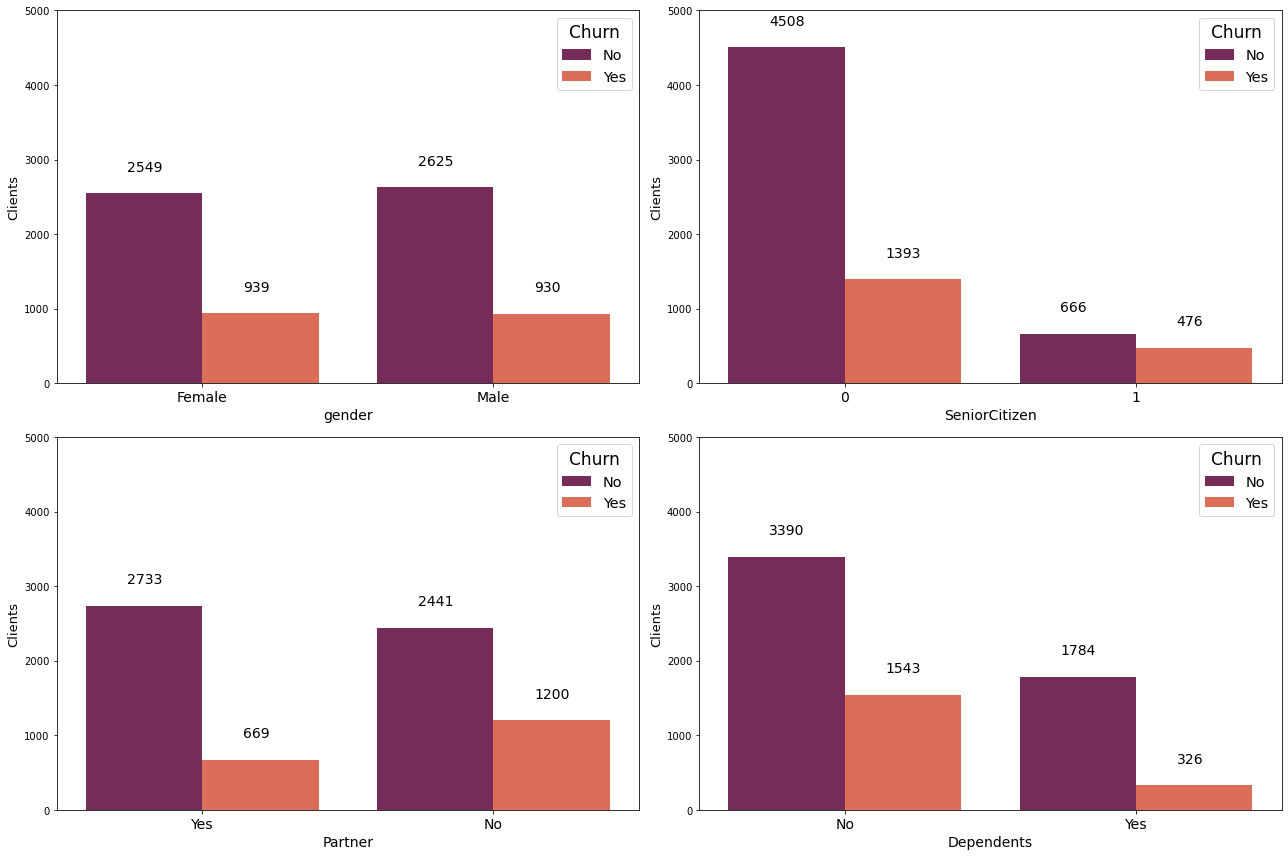

In [194]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [195]:
 df.groupby(['Partner'])['Dependents'].value_counts()

Partner  Dependents
No       No            3280
         Yes            361
Yes      Yes           1749
         No            1653
Name: Dependents, dtype: int64

Most customers with dependents also have partners.

In [196]:
df.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          No       0.657622
                     Yes      0.342378
         Yes         No       0.786704
                     Yes      0.213296
Yes      No          No       0.745917
                     Yes      0.254083
         Yes         No       0.857633
                     Yes      0.142367
Name: Churn, dtype: float64

## Service related features

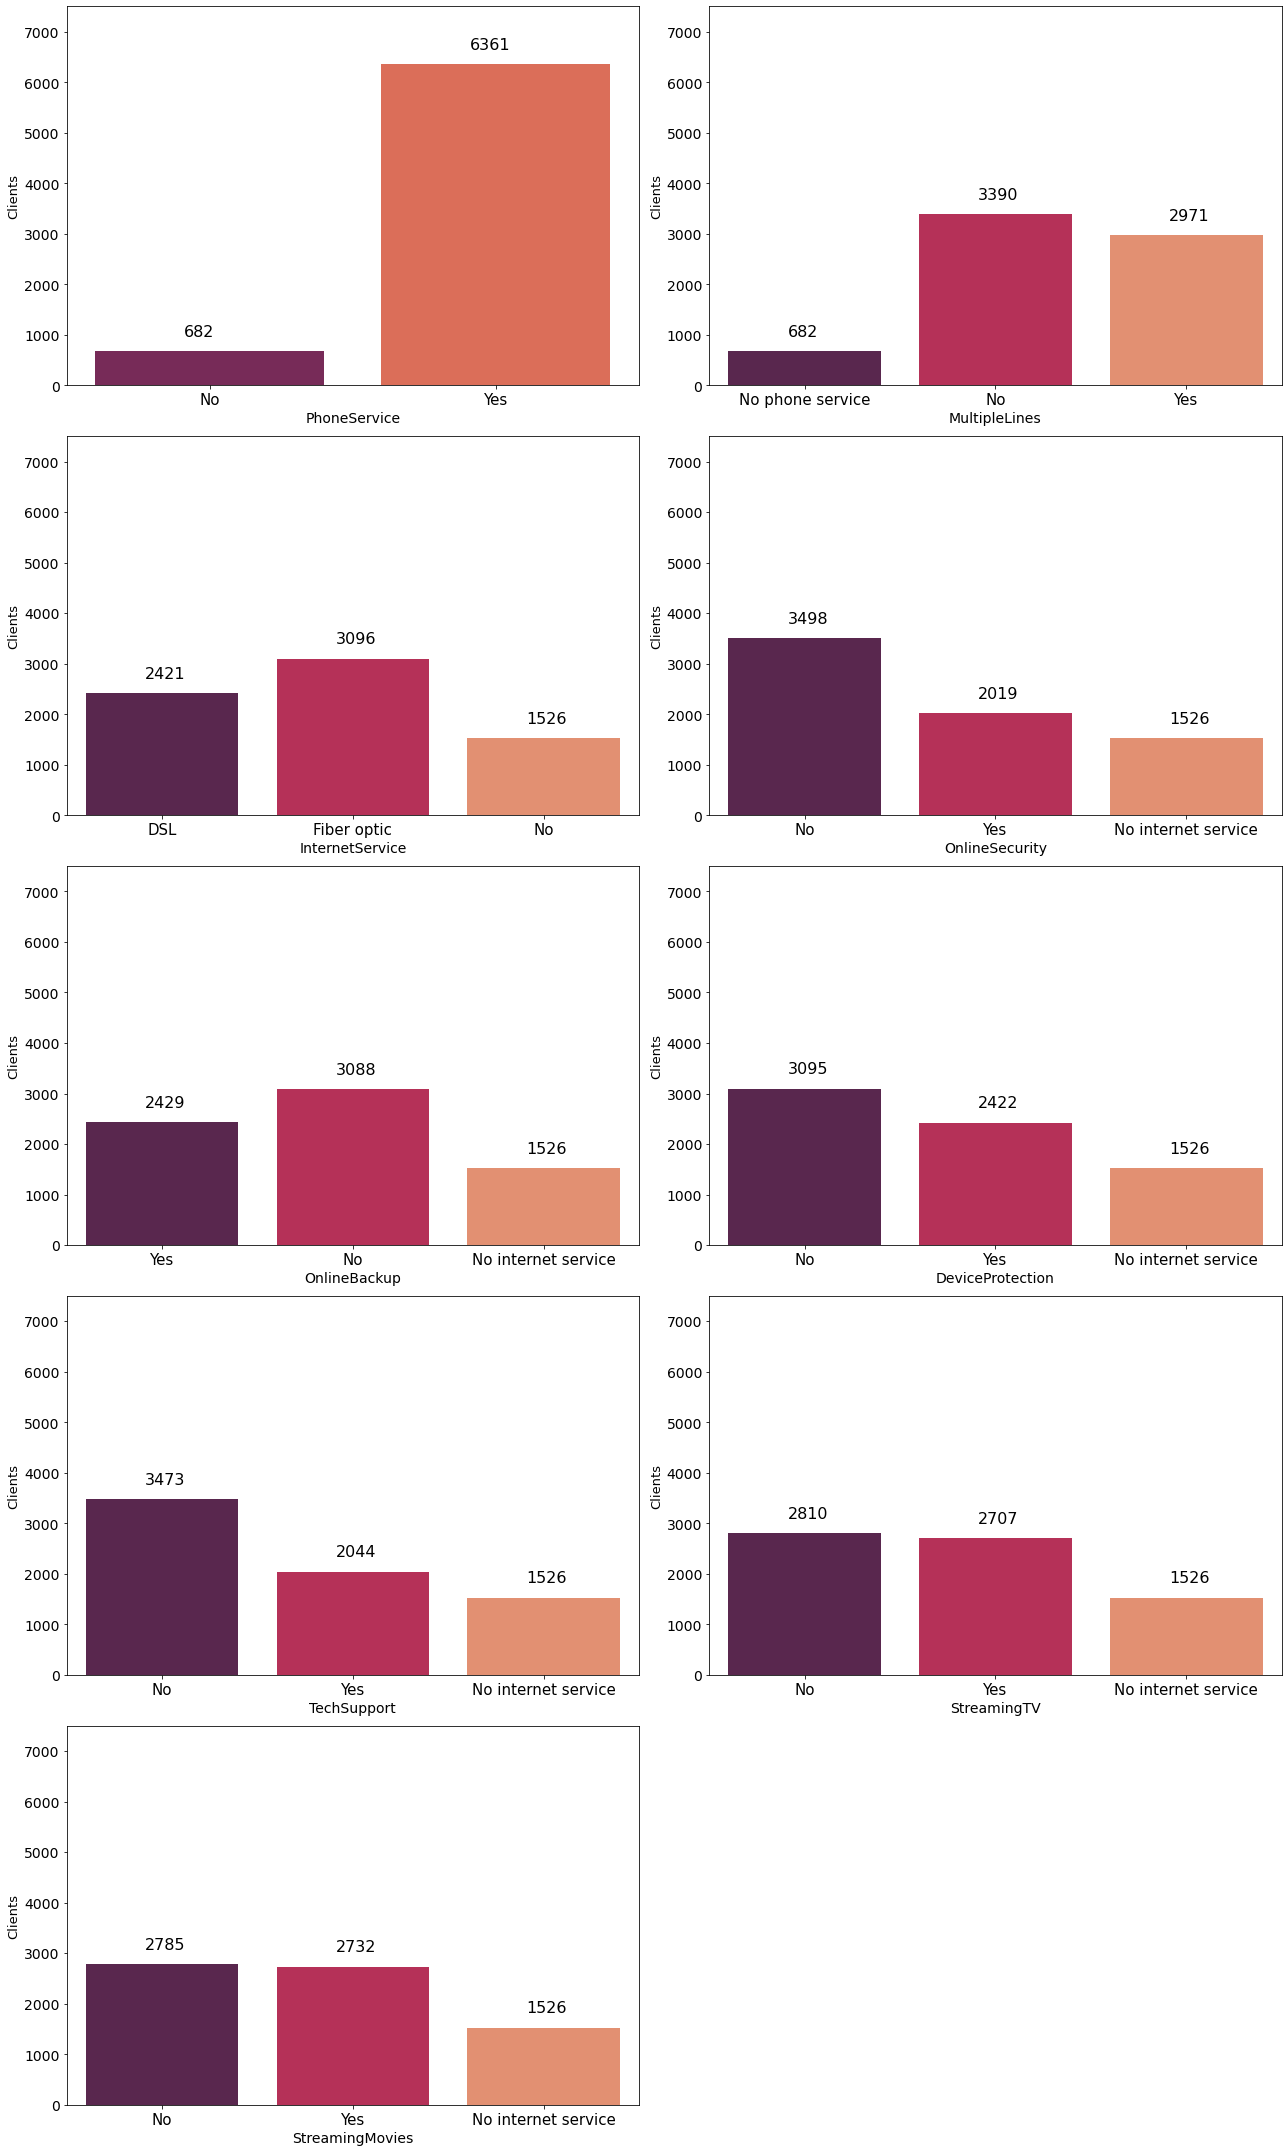

In [197]:
plt.figure(figsize=(18,30))

for i,col in enumerate(Serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,7500)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.31, p.get_height()+300), fontsize= 16)

plt.tight_layout()
plt.show()

A relatively small group of customers doesn’t have internet services and an even smaller one doesn’t have phone services. One thing to keep in mind is that most services can be and/or are only provided to customers who sign the Telco’s internet service.

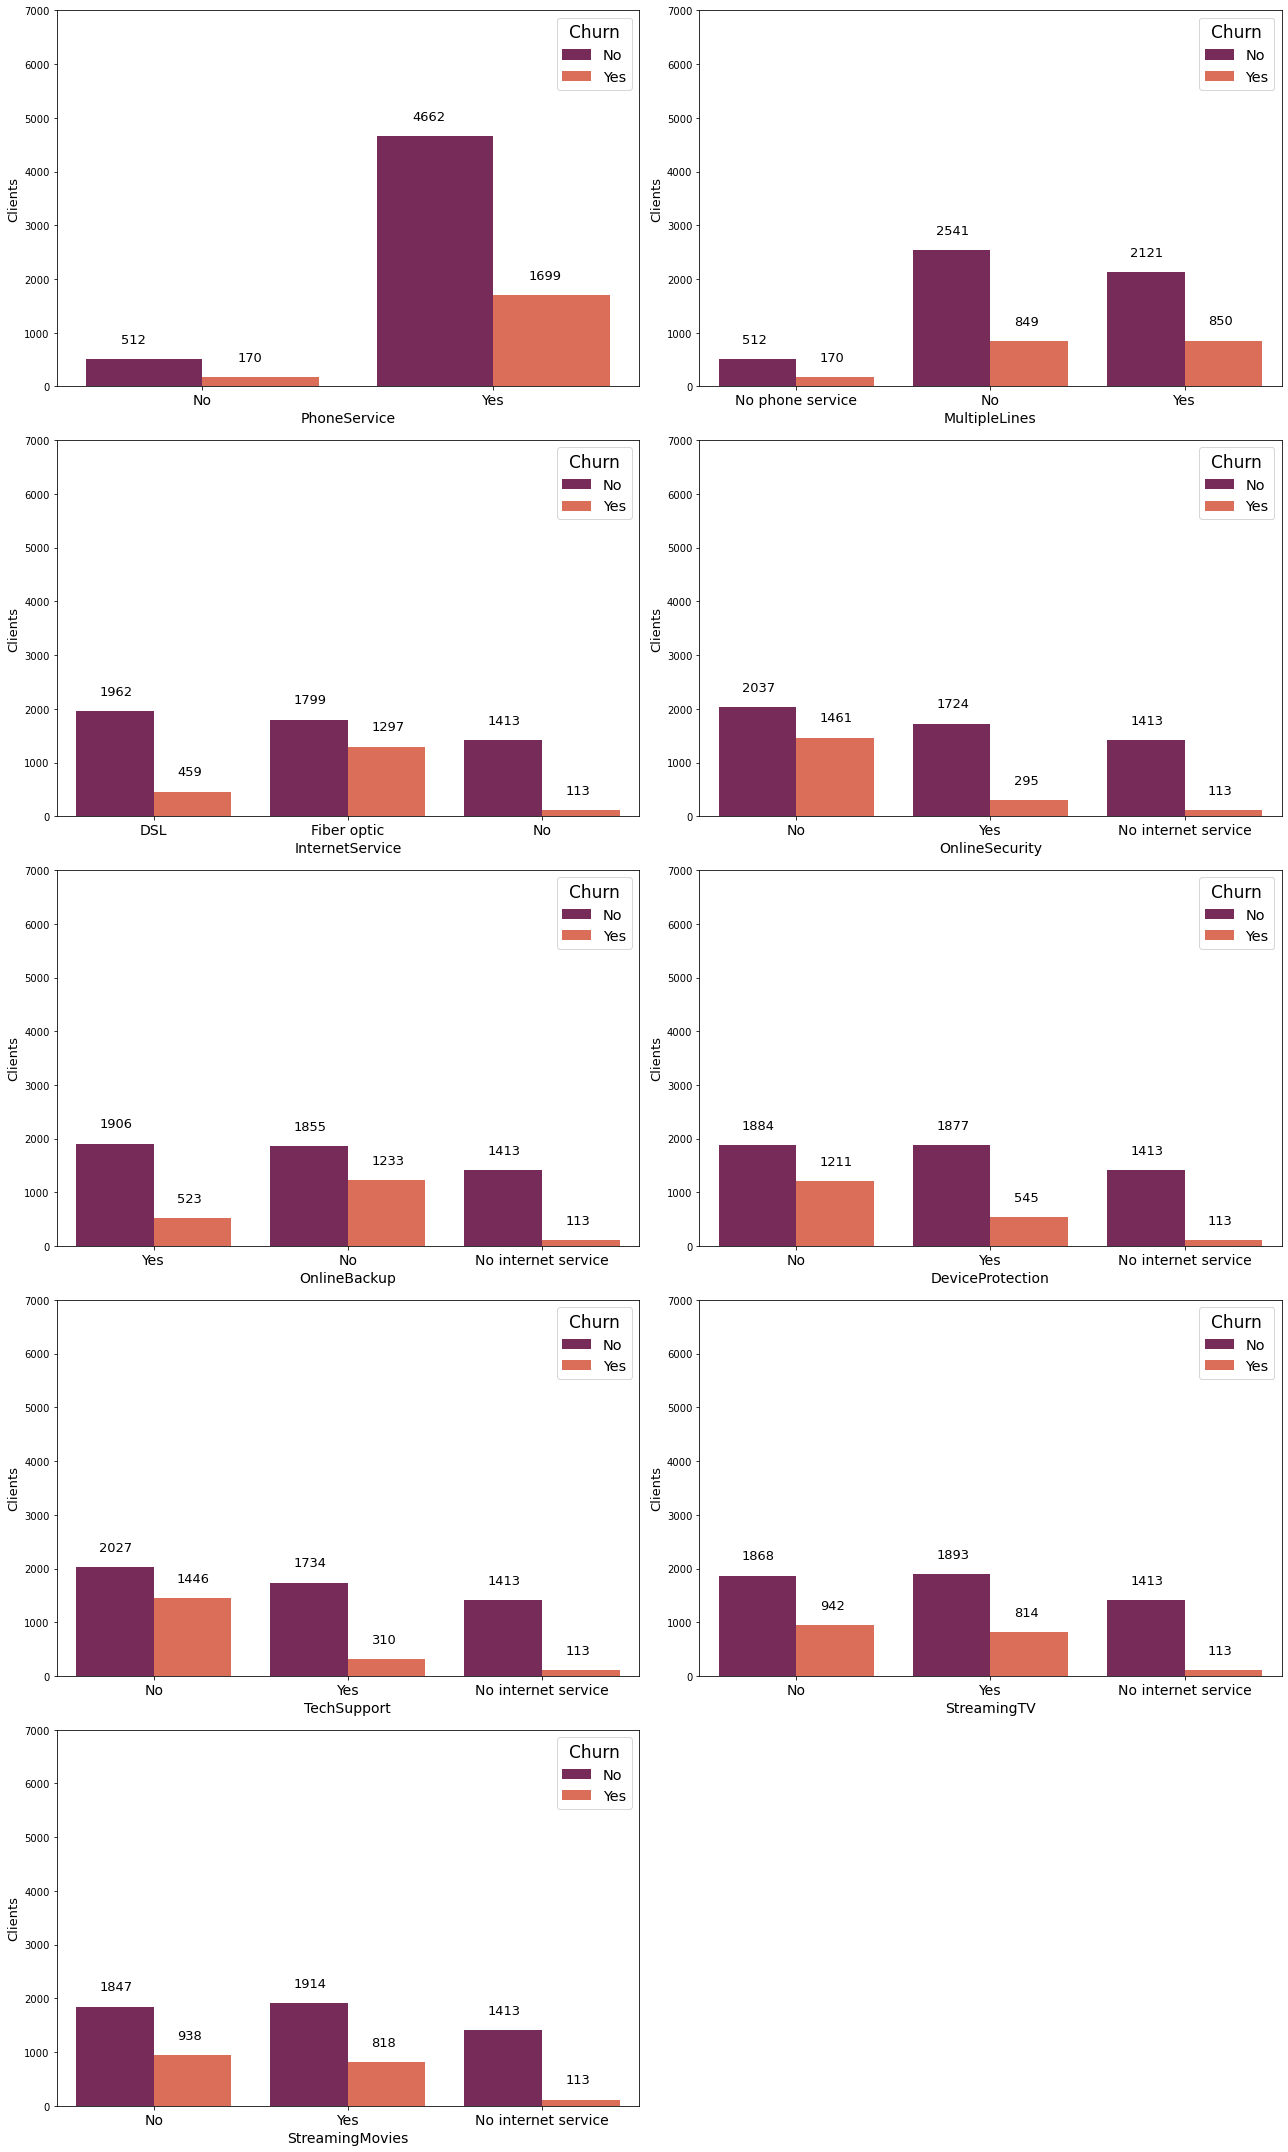

In [198]:
plt.figure(figsize=(18,30))

for i,col in enumerate(Serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)
    
    plt.legend(title = 'Churn', fontsize='x-large', title_fontsize='17')

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+300), fontsize= 13)

plt.tight_layout()


In [199]:
df.groupby(by=['InternetService'])['MonthlyCharges'].mean().sort_values()

InternetService
No             21.079194
DSL            58.102169
Fiber optic    91.500129
Name: MonthlyCharges, dtype: float64

The average charges are significantly different with the different services, with the service with Fiber optic being the most expensive. 

In [200]:
print(df.groupby(by=['TechSupport'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity'])['MonthlyCharges'].mean().sort_values(), '\n')
print(df.groupby(by=['OnlineSecurity', 'TechSupport'])['MonthlyCharges'].mean().sort_values())

TechSupport
No internet service    21.079194
No                     74.586683
Yes                    80.680137
Name: MonthlyCharges, dtype: float64 

OnlineSecurity
No internet service    21.079194
No                     75.693067
Yes                    78.838732
Name: MonthlyCharges, dtype: float64 

OnlineSecurity       TechSupport        
No internet service  No internet service    21.079194
No                   No                     74.188367
Yes                  No                     75.692011
No                   Yes                    79.758148
Yes                  Yes                    81.472930
Name: MonthlyCharges, dtype: float64


The monthly charges has no significant difference between the two services.

## account information features(categorical)

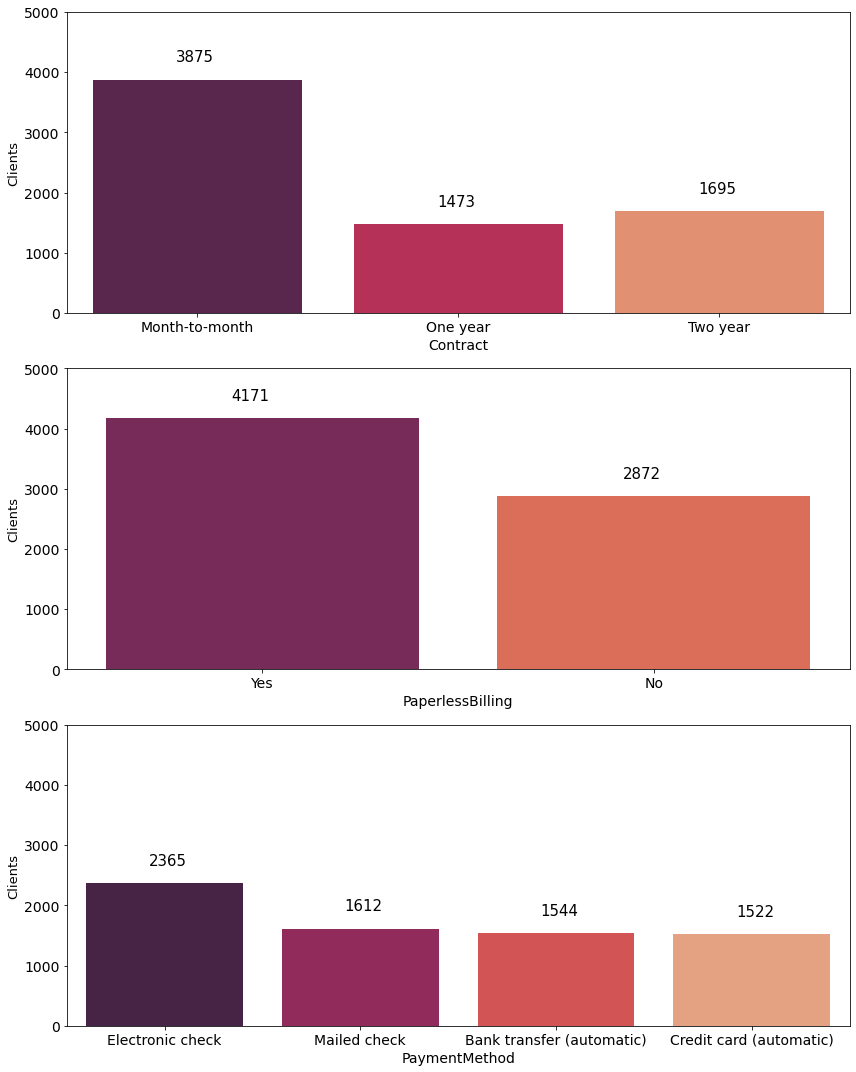

In [201]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_acct_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 14)
    plt.yticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+300), fontsize= 15)

plt.tight_layout()
plt.show()

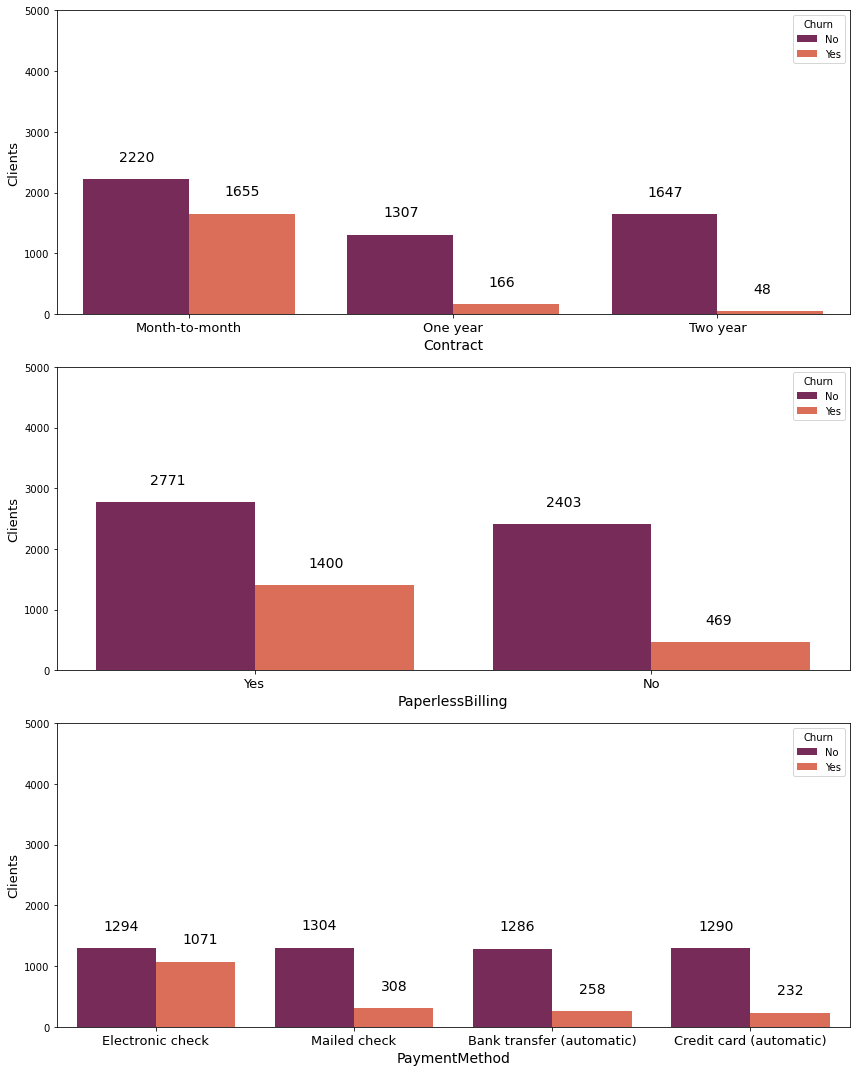

In [202]:
plt.figure(figsize=(12,15))

for i,col in enumerate(cat_acct_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn", palette = 'rocket')

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

In [203]:
print(df.groupby(by=['Contract'])['PaperlessBilling'].value_counts(normalize = True),' \n')
print(df.groupby(by=['Contract'])['PaymentMethod'].value_counts(normalize = True))

Contract        PaperlessBilling
Month-to-month  Yes                 0.667355
                No                  0.332645
One year        Yes                 0.543109
                No                  0.456891
Two year        No                  0.536873
                Yes                 0.463127
Name: PaperlessBilling, dtype: float64  

Contract        PaymentMethod            
Month-to-month  Electronic check             0.477419
                Mailed check                 0.230452
                Bank transfer (automatic)    0.152000
                Credit card (automatic)      0.140129
One year        Credit card (automatic)      0.270197
                Bank transfer (automatic)    0.265445
                Electronic check             0.235574
                Mailed check                 0.228785
Two year        Credit card (automatic)      0.342773
                Bank transfer (automatic)    0.332743
                Mailed check                 0.225369
                Ele

* 66.7 % of the clients who are on month-to-month contract have paperlessbilling.


In [204]:
print(df.groupby(by=['InternetService'])['PaperlessBilling'].value_counts(normalize = True), '\n')
print(df.groupby(by=['InternetService'])['PaymentMethod'].value_counts(normalize = True))

InternetService  PaperlessBilling
DSL              Yes                 0.549360
                 No                  0.450640
Fiber optic      Yes                 0.773579
                 No                  0.226421
No               No                  0.707733
                 Yes                 0.292267
Name: PaperlessBilling, dtype: float64 

InternetService  PaymentMethod            
DSL              Electronic check             0.267658
                 Mailed check                 0.253201
                 Credit card (automatic)      0.245353
                 Bank transfer (automatic)    0.233788
Fiber optic      Electronic check             0.515181
                 Bank transfer (automatic)    0.208656
                 Credit card (automatic)      0.192829
                 Mailed check                 0.083333
No               Mailed check                 0.485583
                 Bank transfer (automatic)    0.217562
                 Credit card (automatic)      0.216907
 

Customers with Internet Service = ‘No’: Less than 30% receive paperless bills and only 8% pay them with electronic check;
Customers with Internet Service = ‘Fiber Optic’: 77% receive paperless bills and more them 51% pay them with electronic check.
We can recall that the lowest churn rate in the internet services feature is from those customers who don’t use Telco’s internet, while the highest is found among those who use their fiber optic internet. 

## account information (numerical)

In [211]:
# Statistics on churn x tenure
print(df.groupby('Churn').tenure.describe().round(0))
# Visualizing how churn interacts with tenure
fig =px.box(df, x='tenure', y='Churn', template='seaborn', title='Churn vs Tenure')
    
fig.show()

        count  mean   std  min   25%   50%   75%   max
Churn                                                 
No     5174.0  38.0  24.0  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  18.0  20.0  1.0   2.0  10.0  29.0  72.0


From the statistics and the chart, we can see that 75% of those who discontinue the service with the company do so within 29 months and half of them leave the company by their 10th month.

In [212]:
# Statistics on churn x monthly charges
print(df.groupby('Churn').MonthlyCharges.describe().round(0))
# Visualizing how churn interacts with monthly charges
fig=px.box(df, x='MonthlyCharges', y='Churn', template='seaborn', title='Churn vs Monthly Charges')
fig.show()

        count  mean   std   min   25%   50%   75%    max
Churn                                                   
No     5174.0  61.0  31.0  18.0  25.0  64.0  88.0  119.0
Yes    1869.0  74.0  25.0  19.0  56.0  80.0  94.0  118.0


The monthly charges for those clients who distinue the service with the company are much higher that the ones who stayed. 

In [216]:
# Statistics on churn x total charges
print(df.groupby('Churn').TotalCharges.describe().round(0))
# Visualizing how churn interacts with total charges
fig=px.box(df, x='TotalCharges', y='Churn', template='seaborn', title='Churn')
fig.show()

        count    mean     std   min    25%     50%     75%     max
Churn                                                             
No     5174.0  2550.0  2330.0   0.0  573.0  1680.0  4263.0  8672.0
Yes    1869.0  1532.0  1891.0  19.0  134.0   704.0  2331.0  8685.0


With already knowing the customers who leave the company paying higher monthly charges, it's not surprise to see the total charges for those who discontinue the service are less because the time they are with the company is shorter.

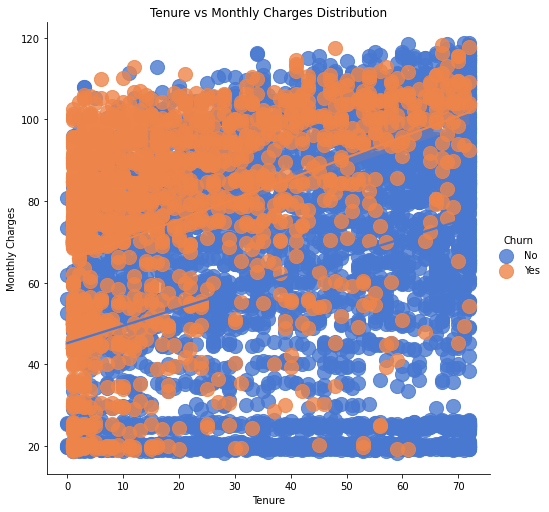

In [215]:
# Tenure x Monthly Charges distribution
g = sns.lmplot(height=7, data=df, x='tenure', y='MonthlyCharges', hue='Churn', scatter_kws={'s': 200},
              line_kws=None, palette='muted')
g.set(xlabel='Tenure', ylabel='Monthly Charges')
g= plt.title('Tenure vs Monthly Charges Distribution')


Not only can we see a large concentration of clients who left the company in the upper left part of the plot above, but we can also see a higher trendline for clients who left, confirming that they do have higher charges per month than those who stay.

## Account info:
* 88.6 % of the churn clients are on month to month contract. 
* 69.6 % of the churn clients have fiber optic service.
* 74.9 % of the churn clients are on paperless billing.
* 90.9 % of the churn clients have phone service.
* 78.2 % of the churn clients don't have Online Security service.
* 66 % of the churn clients have no onlinebackup.
* 64.8 % of the churn clients don't have device protection.
* 77.4 % of the churn clients don't have tech support.

## Machine Learning Model

In [217]:
# Let's split our dataset into independent (X) and dependent (y) variables
X = df.drop('Churn', axis=1)
y = df['Churn'].copy()
print('____________ Independent Variables ____________\n')
print (X)
print('____________ Dependent Variables ____________\n')
print(y)

____________ Independent Variables ____________

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service      

In [218]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [224]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  4930
X test size:  2113
y train size:  4930
y test size:  2113


In [226]:
# Encoding categorical variables
encoder = OrdinalEncoder()
cat_columns_train = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train[cat_columns_train] = encoder.fit_transform(X_train[cat_columns_train])
cat_columns_test = [col for col in X_test.columns if X_test[col].dtype == 'object']
X_test[cat_columns_test] = encoder.transform(X_test[cat_columns_test])

In [227]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,1.0,0,0.0,0.0,20,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,68.70,1416.20
4395,0.0,0,1.0,1.0,69,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,103.95,7446.90
1579,1.0,1,1.0,0.0,12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,80.45,950.20
1040,1.0,1,0.0,0.0,14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,90.45,1266.10
1074,1.0,0,0.0,0.0,1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,21.10,21.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1,0.0,0.0,9,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,100.50,918.60
5192,1.0,0,0.0,1.0,60,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,19.95,1189.90
3980,1.0,0,0.0,0.0,28,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,105.70,2979.50
235,1.0,0,0.0,0.0,2,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,54.40,114.10


In [228]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3381,0.0,0,0.0,0.0,41,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,79.85,3320.75
6180,0.0,1,0.0,0.0,66,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,102.40,6471.85
4829,0.0,0,0.0,0.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.00,524.35
3737,0.0,0,0.0,0.0,5,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,50.60,249.95
4249,0.0,0,1.0,1.0,10,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0,0.0,1.0,10,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,40.25,411.45
1351,1.0,0,1.0,1.0,11,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,20.45,250.80
2048,1.0,1,0.0,0.0,21,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,96.80,2030.30
6218,0.0,0,1.0,1.0,70,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,58.40,4113.15


In [229]:
# Transform Churns into binary values
y_train.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [230]:
# Transform Churns into binary values
y_test.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [231]:
# Let's standardize tenure, MonthlyCharges and TotalCharges
num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [232]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5925,1.0,0,0.0,0.0,-0.497482,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,1.0,2.0,0.129755,-0.378089
4395,0.0,0,1.0,1.0,1.498180,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.299897,2.278159
1579,1.0,1,1.0,0.0,-0.823305,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.519802,-0.583341
1040,1.0,1,0.0,0.0,-0.741849,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,0.851757,-0.444202
1074,1.0,0,0.0,0.0,-1.271311,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-1.450350,-0.992567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,1,0.0,0.0,-0.945488,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.185372,-0.597260
5192,1.0,0,0.0,1.0,1.131630,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,3.0,-1.488525,-0.477764
3980,1.0,0,0.0,0.0,-0.171660,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,1.357989,0.310473
235,1.0,0,0.0,0.0,-1.230583,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.344940,-0.951605


In [233]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3381,0.0,0,0.0,0.0,0.357802,1.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.499885,0.460778
6180,0.0,1,0.0,0.0,1.375997,1.0,2.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,1.248444,1.848694
4829,0.0,0,0.0,0.0,-0.823305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.656978,-0.770909
3737,0.0,0,0.0,0.0,-1.108399,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.471083,-0.891769
4249,0.0,0,1.0,1.0,-0.904760,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,1.0,3.0,0.036808,-0.711139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0,0.0,1.0,-0.904760,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,3.0,-0.814656,-0.820636
1351,1.0,0,1.0,1.0,-0.864033,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,-1.471927,-0.891395
2048,1.0,1,0.0,0.0,-0.456755,1.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,1.062549,-0.107606
6218,0.0,0,1.0,1.0,1.538908,0.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,-0.212158,0.809794


In [234]:
# Dealing with imbalanced data 
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [235]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [236]:
y_train.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [237]:
# Running Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_predict = rf.predict(X_test)

#Running Ada Boost
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_y_predict = ab.predict(X_test)

# Running Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y_predict = gb.predict(X_test)

# Running Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
et_y_predict = et.predict(X_test)

Accuracy: 78.61%
Precision: 56.53%
Recall: 62.31%
F1_Score: 59.28%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

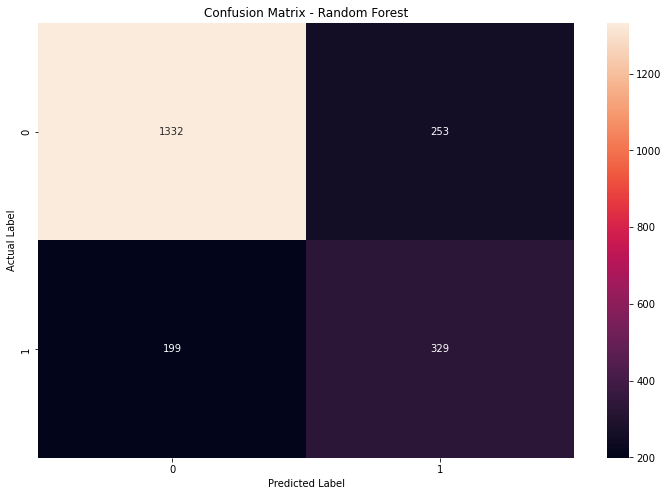

In [238]:
# Random Forest
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, rf_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, rf_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, rf_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, rf_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 78.61%
Precision: 56.53%
Recall: 62.31%
F1_Score: 59.28%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

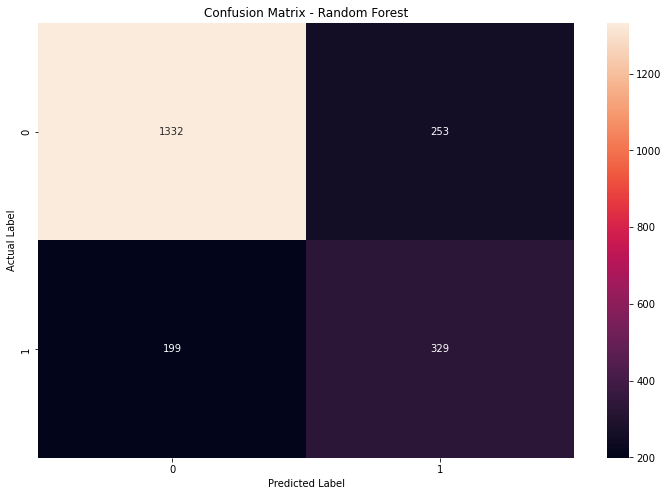

In [239]:
# Random Forest
print('Accuracy: %.2f%%' % (accuracy_score(y_test, rf_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, rf_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, rf_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, rf_y_predict) * 100))
confusion_matrix_rf = confusion_matrix(y_test, rf_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 78.89%
Precision: 55.96%
Recall: 72.92%
F1_Score: 63.32%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

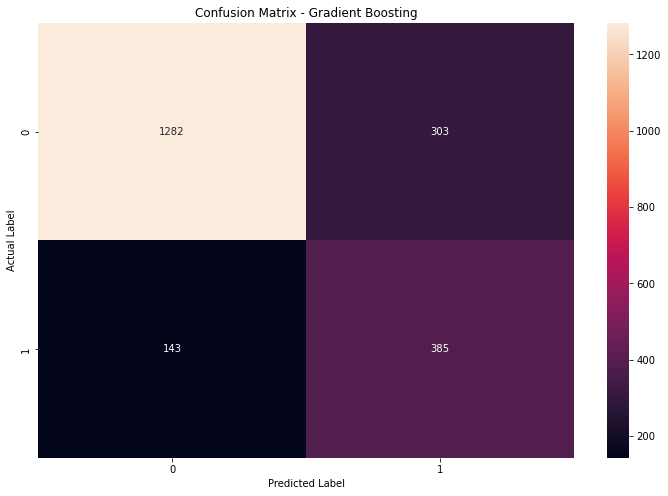

In [240]:
# Gradient Boosting
print('Accuracy: %.2f%%' % (accuracy_score(y_test, gb_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, gb_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, gb_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, gb_y_predict) * 100))
confusion_matrix_gb = confusion_matrix(y_test, gb_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 77.95%
Precision: 55.72%
Recall: 57.20%
F1_Score: 56.45%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

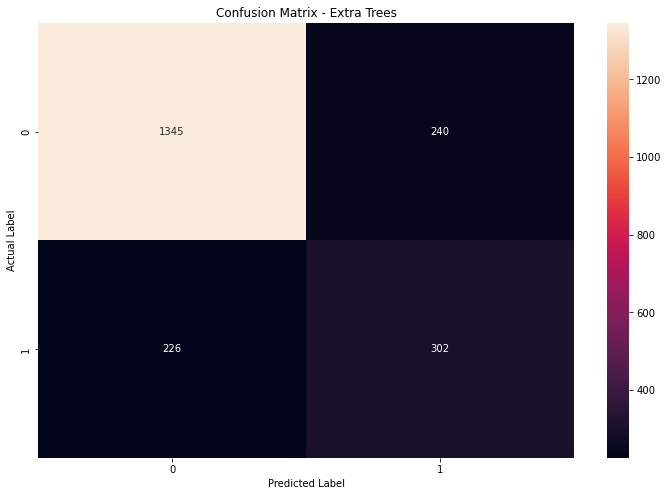

In [241]:
# Extra Trees
print('Accuracy: %.2f%%' % (accuracy_score(y_test, et_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, et_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, et_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, et_y_predict) * 100))
confusion_matrix_et = confusion_matrix(y_test, et_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_et, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Extra Trees')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## feature importance

In [267]:
# Now let's take a look which has the most impact on the customers churn 
classifier =RandomForestClassifier(n_estimators=100)
classifier_churn =classifier.fit(X_train,y_train)

feature_importance=pd.DataFrame({'Feature_names':X_train.columns.tolist(), 'Feature_importances': classifier_churn.feature_importances_})

,Feature_names,Feature_importances
4,tenure,0.149302
18,TotalCharges,0.135707
17,MonthlyCharges,0.135503
14,Contract,0.133904
16,PaymentMethod,0.062174
11,TechSupport,0.056381
15,PaperlessBilling,0.043528
8,OnlineSecurity,0.036977
7,InternetService,0.035952
0,gender,0.034711


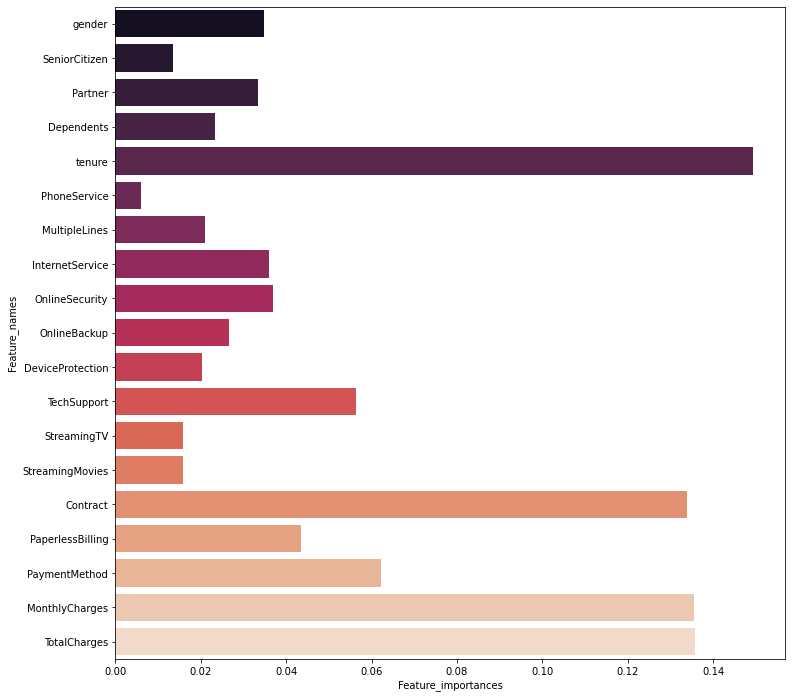

In [271]:
feature_importance.sort_values(by=['Feature_importances'], ascending=False)
plt.figure(figsize=(12, 12))
sns.barplot(x=feature_importance['Feature_importances'], y=feature_importance['Feature_names'], palette='rocket')
plt.show()